<div style="color:Red;font-size:30px" align="center" >Classify wine Category from its chemical properties</div>

### Task1

In [255]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score ,precision_score ,f1_score ,recall_score,classification_report

In [256]:
df=pd.read_csv("DS2_C5_S4_Wine_Data_Practice.data",header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [257]:
# #renaming all columns 
new=["target","alcohol","malic_acid","ash","alcalinity_of_ash","magnesium","phenols","flavanoids","non_flavanoid_phenols","proanthocyanins","color_intensity","hue","OD280","proline"] 
old=df.columns.to_list()
# for i in range(len(old)):
#     df=df.rename(columns={old[i]:new[i]})
# df.head()
df=df.rename(columns={i:j for i,j in zip(old,new)})
df.head()

,target,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,phenols,flavanoids,non_flavanoid_phenols,proanthocyanins,color_intensity,hue,OD280,proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [258]:
df["target"].value_counts()

2    71
1    59
3    48
Name: target, dtype: int64

In [259]:
#target column is the dependent variable and rest are independent features

In [260]:
df.shape

(178, 14)

In [261]:
df.columns

Index(['target', 'alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash',
       'magnesium', 'phenols', 'flavanoids', 'non_flavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue', 'OD280', 'proline'],
      dtype='object')

In [262]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   target                 178 non-null    int64  
 1   alcohol                178 non-null    float64
 2   malic_acid             178 non-null    float64
 3   ash                    178 non-null    float64
 4   alcalinity_of_ash      178 non-null    float64
 5   magnesium              178 non-null    int64  
 6   phenols                178 non-null    float64
 7   flavanoids             178 non-null    float64
 8   non_flavanoid_phenols  178 non-null    float64
 9   proanthocyanins        178 non-null    float64
 10  color_intensity        178 non-null    float64
 11  hue                    178 non-null    float64
 12  OD280                  178 non-null    float64
 13  proline                178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


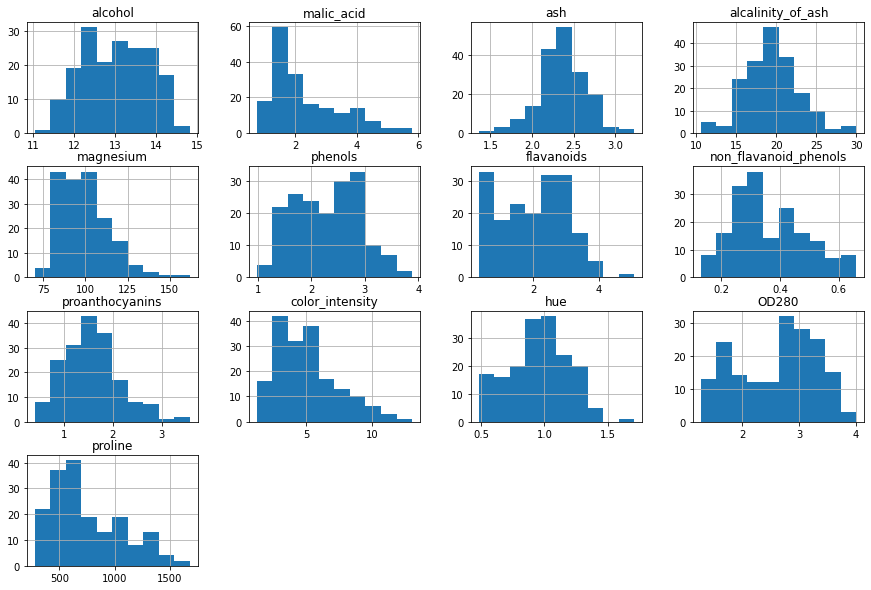

In [263]:
#histograms for all independent variables
df.iloc[:,1:].hist(figsize=(15,10))
plt.show()

In [264]:
#all variables are normally distributed but are skewed with outliers

### Task2

In [265]:
#checking for missing values 

In [266]:
df.isnull().sum()

target                   0
alcohol                  0
malic_acid               0
ash                      0
alcalinity_of_ash        0
magnesium                0
phenols                  0
flavanoids               0
non_flavanoid_phenols    0
proanthocyanins          0
color_intensity          0
hue                      0
OD280                    0
proline                  0
dtype: int64

In [267]:
#there are no null values in our dataset

In [268]:
#Normalizing values to zero mean and unit SD using Standard Scaler

In [269]:
x=df.iloc[:,1:]
y=df["target"]

In [270]:
scaler=StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)
x

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,phenols,flavanoids,non_flavanoid_phenols,proanthocyanins,color_intensity,hue,OD280,proline
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,0.876275,2.974543,0.305159,0.301803,-0.332922,-0.985614,-1.424900,1.274310,-0.930179,1.142811,-1.392758,-1.231206,-0.021952
174,0.493343,1.412609,0.414820,1.052516,0.158572,-0.793334,-1.284344,0.549108,-0.316950,0.969783,-1.129518,-1.485445,0.009893
175,0.332758,1.744744,-0.389355,0.151661,1.422412,-1.129824,-1.344582,0.549108,-0.422075,2.224236,-1.612125,-1.485445,0.280575
176,0.209232,0.227694,0.012732,0.151661,1.422412,-1.033684,-1.354622,1.354888,-0.229346,1.834923,-1.568252,-1.400699,0.296498


<AxesSubplot:>

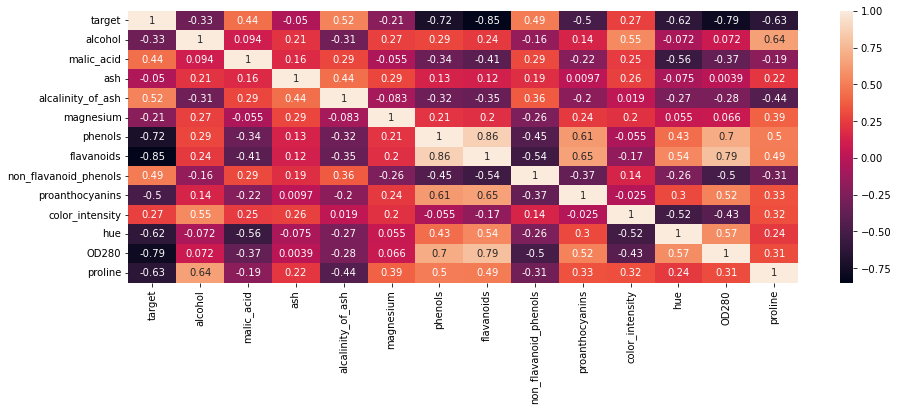

In [271]:
#Correlation matrix
plt.figure(figsize=(15,5))
sb.heatmap(df.corr(),annot=True)

In [272]:
df.columns

Index(['target', 'alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash',
       'magnesium', 'phenols', 'flavanoids', 'non_flavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue', 'OD280', 'proline'],
      dtype='object')

In [273]:
#based on correlation matrix, top features wrt target are flavanoids,OD280,phenols,proline,hue
#taking all features gave a better model so just keeping that as itis

In [274]:
#train test split in ratio of 80:20
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

### Task3

In [275]:
#building gaussian naive bayes classifier model
model=GaussianNB().fit(x_train,y_train)

In [276]:
#train accuracy
model.score(x_train,y_train)

0.971830985915493

In [277]:
#test accuracy
model.score(x_test,y_test)

1.0

In [278]:
y_pred=model.predict(x_test)

In [279]:
#y as precited by model
y_pred.shape

(36,)

In [280]:
#y actual vs predicted as per gaussian naive bayes algo
df_y1=pd.DataFrame({"actual":y_test,'predicted':y_pred})
df_y1.head()

,actual,predicted
19,1,1
45,1,1
140,3,3
30,1,1
67,2,2


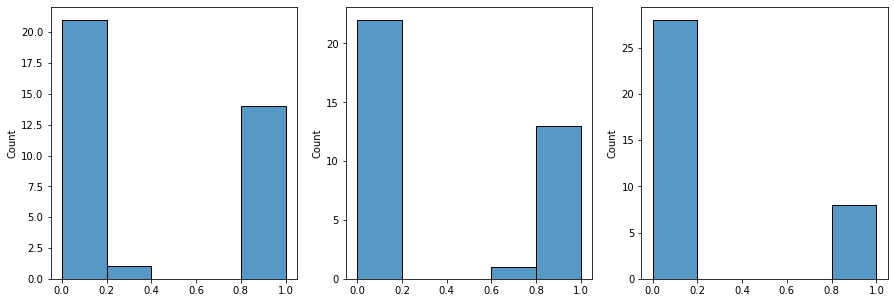

In [281]:
#probabilities of all classes for each row
plt.figure(figsize=(15,5))
p=model.predict_proba(x_test)
plt.subplot(131)
sb.histplot(p[:,0],bins=5)
plt.subplot(132)
sb.histplot(p[:,1],bins=5)
plt.subplot(133)
sb.histplot(p[:,2],bins=5)
plt.show()

In [282]:
#for all the three classes probability values are distributed highly in 0-0.2 bin

### Task4

In [283]:
#Decision Tree Algorithm
model2=DecisionTreeClassifier().fit(x_train,y_train)

In [284]:
#train accuracy
model2.score(x_train,y_train)

1.0

In [285]:
#test accuracy
model2.score(x_test,y_test)

0.9444444444444444

In [286]:
y_pred2=model2.predict(x_test)

In [287]:
#y actual vs predicted as per decision tree algorithm
df_y2=pd.DataFrame({"actual":y_test,'predicted':y_pred2})
df_y2.head()

,actual,predicted
19,1,1
45,1,1
140,3,3
30,1,1
67,2,2


### Task5

In [288]:
#Metrics for both models and their comparisons

In [289]:
a=accuracy_score(y_test,y_pred)
p=precision_score(y_test,y_pred,average="weighted")
r=recall_score(y_test,y_pred,average="weighted")
f=f1_score(y_test,y_pred,average="weighted")
a2=accuracy_score(y_test,y_pred2)
p2=precision_score(y_test,y_pred2,average="weighted")
r2=recall_score(y_test,y_pred2,average="weighted")
f2=f1_score(y_test,y_pred2,average="weighted")

In [290]:
metrics=pd.DataFrame({"Guassian Naive Bayes":[a,p,r,f],"Decision Tree":[a2,p2,r2,f2]},index=["Accuracy","Precision","Recall","F1 Score"])
metrics

,Guassian Naive Bayes,Decision Tree
Accuracy,1.0,0.944444
Precision,1.0,0.951389
Recall,1.0,0.944444
F1 Score,1.0,0.944856


In [291]:
#To classify future produced wine samples we can use Naive Bayes model as it is more accurate for our features